In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import plot_importance

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/corrected CIC dataset/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv')
df2 = pd.read_csv('/content/drive/MyDrive/corrected CIC dataset/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv')
df3 = pd.read_csv('/content/drive/MyDrive/corrected CIC dataset/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv')
df4 = pd.read_csv('/content/drive/MyDrive/corrected CIC dataset/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')
df5 = pd.read_csv('/content/drive/MyDrive/corrected CIC dataset/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv')
df6 = pd.read_csv('/content/drive/MyDrive/corrected CIC dataset/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv')
df7 = pd.read_csv('/content/drive/MyDrive/corrected CIC dataset/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
df8 = pd.read_csv('/content/drive/MyDrive/corrected CIC dataset/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')

In [ ]:
df5[df5['Label']=='Infiltration'].head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
66383,444,42664070,5,6,141,291,93,0,28.200000,38.861292,...,20,0.0,0.0000,0,0,0.0,0.000,0,0,Infiltration
68410,444,2030,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0000,0,0,0.0,0.000,0,0,Infiltration
72581,444,119991834,5523,5525,2866110,33406,1274,0,518.940793,204.203530,...,20,997842.0,831471.3076,1585781,409903,8143987.5,1821773.648,9432176,6855799,Infiltration
73090,444,5005212,15,15,0,90,0,0,0.000000,0.000000,...,28,0.0,0.0000,0,0,0.0,0.000,0,0,Infiltration
73634,444,119973135,4376,4374,2321478,26244,1273,6,530.502285,262.768815,...,20,0.0,0.0000,0,0,0.0,0.000,0,0,Infiltration


In [ ]:
data=[df1,df2,df3,df4,df5,df6,df7,df8]
df=pd.concat(data,ignore_index=True)

In [ ]:
df.dtype()

Destination Port               float64
Flow Duration                  float64
Total Fwd Packets              float64
Total Backward Packets         float64
Total Length of Fwd Packets    float64
                                ...   
Idle Mean                      float64
Idle Std                       float64
Idle Max                       float64
Idle Min                       float64
Label                            int64
Length: 79, dtype: object

In [ ]:
# Min-max normalization
numeric_features = df.dtypes[df.dtypes != 'object'].index
df[numeric_features] = df[numeric_features].apply(
    lambda x: (x - x.min()) / (x.max()-x.min()))
# Fill empty values by 0
df = df.fillna(0)

In [ ]:
df['Label'].value_counts()

BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: Label, dtype: int64

In [ ]:
labelencoder = LabelEncoder()
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:, -1])
X = df.drop(['Label'],axis=1).values
y = df.iloc[:, -1].values.reshape(-1,1)
y=np.ravel(y)#to convert y to a 1D array.
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)
#The stratify=y argument ensures that the class distribution is preserved in the training and testing sets, which is important when dealing with imbalanced datasets.

In [ ]:
pd.Series(y_train).value_counts()

0     1818477
4      184858
10     127144
2      102421
3       10000
7       10000
11      10000
6        8000
5        8000
14       4000
12       4000
1        4000
9        1000
13       1000
8        1000
dtype: int64

In [ ]:
#Oversampling using SMOTE
from imblearn.over_sampling import SMOTE
smote=SMOTE(n_jobs=-1,sampling_strategy={11:10000, 7:10000, 3:10000, 6:8000, 5:8000, 1:4000, 12:4000, 14:4000 , 9:1000, 13:1000, 8:1000})

In [ ]:
X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
pd.Series(y_train).value_counts()

0     1818477
4      184858
10     127144
2      102421
3       10000
7       10000
11      10000
6        8000
5        8000
14       4000
12       4000
1        4000
9        1000
13       1000
8        1000
dtype: int64

Accuracy of DT: 0.9983043333115488
Precision of DT: 0.9983651365065256
Recall of DT: 0.9983043333115488
F1-score of DT: 0.998329012640222
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    454620
           1       0.79      0.83      0.81       393
           2       1.00      1.00      1.00     25606
           3       0.99      0.99      0.99      2059
           4       1.00      1.00      1.00     46215
           5       0.99      0.98      0.99      1100
           6       0.99      0.99      0.99      1159
           7       1.00      1.00      1.00      1588
           8       1.00      1.00      1.00         2
           9       0.50      0.71      0.59         7
          10       0.99      0.99      0.99     31786
          11       1.00      1.00      1.00      1179
          12       0.75      0.65      0.70       301
          13       0.16      0.75      0.26         4
          14       0.39      0.52      0.44       1

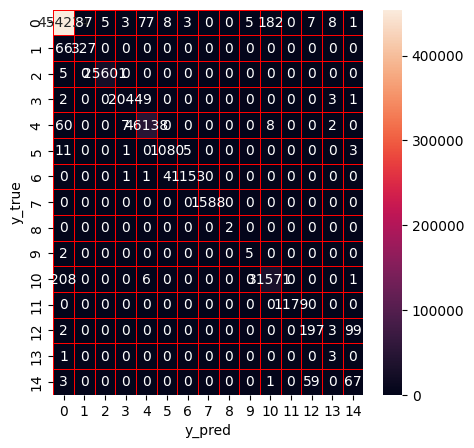

In [ ]:
#  Decision tree training and prediction
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train,y_train)
dt_score=dt.score(X_test,y_test)
y_predict=dt.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
dt_train=dt.predict(X_train)
dt_test=dt.predict(X_test)

In [ ]:
y_predict

array([ 0,  0, 12, ...,  4,  0,  0])

In [ ]:
# Random Forest training and prediction
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train,y_train)
rf_score=rf.score(X_test,y_test)
y_predict=rf.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
rf_train=rf.predict(X_train)
rf_test=rf.predict(X_test)

Accuracy of XGBoost: 0.998217783657659
Precision of XGBoost: 0.9983352383968677
Recall of XGBoost: 0.998217783657659
F1-score of XGBoost: 0.9982425284673732
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    454620
           1       0.71      0.92      0.80       393
           2       1.00      1.00      1.00     25606
           3       1.00      0.99      0.99      2059
           4       0.99      1.00      1.00     46215
           5       0.98      0.98      0.98      1100
           6       0.99      0.96      0.97      1159
           7       1.00      1.00      1.00      1588
           8       1.00      1.00      1.00         2
           9       1.00      0.71      0.83         7
          10       0.99      1.00      1.00     31786
          11       1.00      1.00      1.00      1179
          12       0.84      0.57      0.68       301
          13       1.00      0.50      0.67         4
          14       0.44      0.7

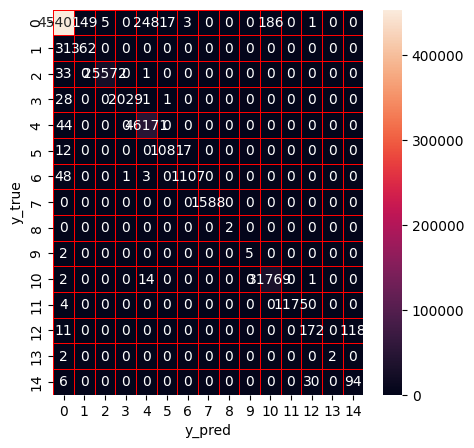

In [ ]:
# XGboost training and prediction
xg = xgb.XGBClassifier(n_estimators = 10)
xg.fit(X_train,y_train)
xg_score=xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
xg_train=xg.predict(X_train)
xg_test=xg.predict(X_test)

In [ ]:
y_predict[1:50]

array([ 0, 12,  4,  0, 10,  0,  0,  0,  0,  0,  0,  0,  0, 10,  0,  0,  0,
        0, 10,  0,  0,  2,  0,  2,  0,  0,  0,  0, 10,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  4,  3,  2,  0,  0,  0,  0])

Accuracy of ET: 0.9982937353947459
Precision of ET: 0.9983265507424515
Recall of ET: 0.9982937353947459
F1-score of ET: 0.9983018101570208
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    454620
           1       0.81      0.79      0.80       393
           2       1.00      1.00      1.00     25606
           3       0.99      0.99      0.99      2059
           4       1.00      1.00      1.00     46215
           5       0.99      0.99      0.99      1100
           6       0.99      0.99      0.99      1159
           7       1.00      1.00      1.00      1588
           8       1.00      1.00      1.00         2
           9       1.00      0.57      0.73         7
          10       0.99      0.99      0.99     31786
          11       1.00      0.99      1.00      1179
          12       0.76      0.60      0.67       301
          13       0.25      0.50      0.33         4
          14       0.38      0.53      0.44       

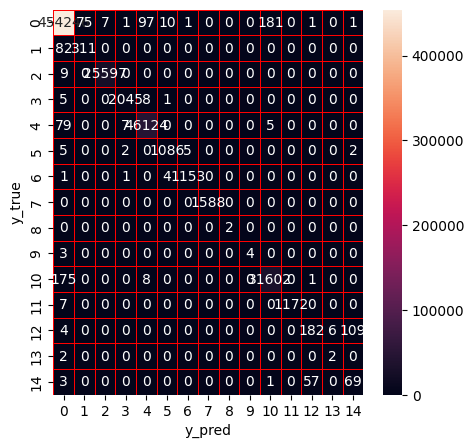

In [ ]:
# Extra trees training and prediction
et = ExtraTreesClassifier(random_state = 0)
et.fit(X_train,y_train)
et_score=et.score(X_test,y_test)
y_predict=et.predict(X_test)
y_true=y_test
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
et_train=et.predict(X_train)
et_test=et.predict(X_test)

ENSENMBLE MODEL


In [ ]:
# Use the outputs of 4 base models to construct a new ensemble model
base_predictions_train = pd.DataFrame( {
    'DecisionTree': dt_train.ravel(),
        'RandomForest': rf_train.ravel(),
     'ExtraTrees': et_train.ravel(),
     'XgBoost': xg_train.ravel(),
    })
base_predictions_train.head(5)

In [ ]:
dt_train=dt_train.reshape(-1, 1)
et_train=et_train.reshape(-1, 1)
rf_train=rf_train.reshape(-1, 1)
xg_train=xg_train.reshape(-1, 1)
dt_test=dt_test.reshape(-1, 1)
et_test=et_test.reshape(-1, 1)
rf_test=rf_test.reshape(-1, 1)
xg_test=xg_test.reshape(-1, 1)

In [ ]:
x_train = np.concatenate(( dt_train, et_train, xg_train), axis=1)
x_test = np.concatenate(( dt_test, et_test, xg_test), axis=1)

In [ ]:
stk = xgb.XGBClassifier().fit(x_train, y_train)


In [ ]:
y_predict=stk.predict(x_test)
y_true=y_test
stk_score=accuracy_score(y_true,y_predict)
print('Accuracy of Stacking: '+ str(stk_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of Stacking: '+(str(precision)))
print('Recall of Stacking: '+(str(recall)))
print('F1-score of Stacking: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

FEATURE SELECTION

In [ ]:
# Save the feature importance lists generated by four tree-based algorithms
dt_feature = dt.feature_importances_
rf_feature = rf.feature_importances_
et_feature = et.feature_importances_
xgb_feature = xg.feature_importances_


In [ ]:
# calculate the average importance value of each feature
avg_feature = (dt_feature + rf_feature + et_feature + xgb_feature)/4

In [ ]:
feature=(df.drop(['Label'],axis=1)).columns.values
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), avg_feature), feature), reverse=True))

In [ ]:
f_list = sorted(zip(map(lambda x: round(x, 4), avg_feature), feature), reverse=True)
len(f_list)


In [ ]:
# Select the important features from top-importance to bottom-importance until the accumulated importance reaches 0.9 (out of 1)

Sum = 0
fs = []
for i in range(0, len(f_list)):
    Sum = Sum + f_list[i][0]
    fs.append(f_list[i][1])
    if Sum>=0.9:
        break

In [ ]:
X_fs = df[fs].values


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_fs,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)


In [ ]:
X_train.shape


In [ ]:
pd.Series(y_train).value_counts()


OVERSAMPLING BY SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(n_jobs=-1,sampling_strategy={11:10000, 7:10000, 3:10000, 6:8000, 5:8000, 1:4000, 12:4000, 14:4000 , 9:1000, 13:1000, 8:1000})

In [ ]:
X_train, y_train = smote.fit_resample(X_train, y_train)


In [ ]:
pd.Series(y_train).value_counts()


Machine learning model training after feature selection


In [ ]:
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train,y_train)
dt_score=dt.score(X_test,y_test)
y_predict=dt.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
dt_train=dt.predict(X_train)
dt_test=dt.predict(X_test)

In [ ]:
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train,y_train)
rf_score=rf.score(X_test,y_test)
y_predict=rf.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
rf_train=rf.predict(X_train)
rf_test=rf.predict(X_test)

In [ ]:
et = ExtraTreesClassifier(random_state = 0)
et.fit(X_train,y_train)
et_score=et.score(X_test,y_test)
y_predict=et.predict(X_test)
y_true=y_test
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
et_train=et.predict(X_train)
et_test=et.predict(X_test)

In [ ]:
xg = xgb.XGBClassifier(n_estimators = 10)
xg.fit(X_train,y_train)
xg_score=xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
xg_train=xg.predict(X_train)
xg_test=xg.predict(X_test)

Stacking model construction


In [ ]:
base_predictions_train = pd.DataFrame( {
    'DecisionTree': dt_train.ravel(),
        'RandomForest': rf_train.ravel(),
     'ExtraTrees': et_train.ravel(),
     'XgBoost': xg_train.ravel(),
    })
base_predictions_train.head(5)

In [ ]:
dt_train=dt_train.reshape(-1, 1)
et_train=et_train.reshape(-1, 1)
rf_train=rf_train.reshape(-1, 1)
xg_train=xg_train.reshape(-1, 1)
dt_test=dt_test.reshape(-1, 1)
et_test=et_test.reshape(-1, 1)
rf_test=rf_test.reshape(-1, 1)
xg_test=xg_test.reshape(-1, 1)

In [ ]:
x_train = np.concatenate(( dt_train, et_train , xg_train), axis=1)
x_test = np.concatenate(( dt_test, et_test, xg_test), axis=1)

In [ ]:
#creating a ensemble model after feature selection
stk = xgb.XGBClassifier().fit(x_train, y_train)
y_predict=stk.predict(x_test)
y_true=y_test
stk_score=accuracy_score(y_true,y_predict)
print('Accuracy of Stacking: '+ str(stk_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of Stacking: '+(str(precision)))
print('Recall of Stacking: '+(str(recall)))
print('F1-score of Stacking: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()